# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: man

Last Name: pan

Student ID: 914656278

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [92]:
import requests
import requests_cache
import pandas as pd
import json
import lxml
from bs4 import BeautifulSoup as bs
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sys
import re
import wordcloud
import matplotlib.pyplot as plt

In [3]:
def get_links(category, pages = 1, verbose = False):
    links = []
    for page in range(1, pages + 1):
        url = "https://theaggie.org/" + category + "/page/" + str(page)
        geturl = requests.get(url)
        if verbose:
            print (geturl.url)
        content = geturl.content
        parse = bs(content, 'lxml-html') #lxml-html
        title = parse.findAll('h2', class_ = 'entry-title')
        for tag in title:
            tdTags = tag.find_all('a')[0]['href']
            links.append(tdTags)
        next_page = parse.findAll('a', class_ = 'next page-numbers')
        if len(next_page) == 0:
            break
    return links

In [3]:
get_links("arts", pages = 1)

['https://theaggie.org/2018/03/07/tats-and-tech/',
 'https://theaggie.org/2018/03/05/style-watch-earthy-tones-functionality-reign/',
 'https://theaggie.org/2018/03/05/sourdough-co-opens-university-mall/',
 'https://theaggie.org/2018/03/04/creating-positive-change-fashion-onus/',
 'https://theaggie.org/2018/03/04/three-billboards-review/',
 'https://theaggie.org/2018/03/01/march-events-calendar/',
 'https://theaggie.org/2018/03/01/artists-eye-shuyi-qi/',
 'https://theaggie.org/2018/03/01/phantom-thread-review-aggies-arts-desk/',
 'https://theaggie.org/2018/02/27/judah-lion-concert-review/',
 'https://theaggie.org/2018/02/26/guest-opinion-paddington-2-breaks-new-ground-high-quality-sequels/',
 'https://theaggie.org/2018/02/26/inked/',
 'https://theaggie.org/2018/02/26/arts-humanities-ges-spring-quarter/',
 'https://theaggie.org/2018/02/25/evolution-stereotypical-college-diet/',
 'https://theaggie.org/2018/02/25/east-coast-cello-rock-band-meets-davis/',
 'https://theaggie.org/2018/02/23/m

In [4]:
get_links("sciencetech", pages = 1)

['https://theaggie.org/2018/03/06/first-statewide-estimation-nox-california/',
 'https://theaggie.org/2018/03/05/new-findings-brain-processes-using-virtual-reality/',
 'https://theaggie.org/2018/03/05/reserves-reliable-resource/',
 'https://theaggie.org/2018/03/04/health-and-honey/',
 'https://theaggie.org/2018/03/02/following-script-women-crying-workplace/',
 'https://theaggie.org/2018/02/27/how-does-thermoostat-work/',
 'https://theaggie.org/2018/02/26/paws-fish-skins/',
 'https://theaggie.org/2018/02/26/trusting-land-environmental-policy-native-activism/',
 'https://theaggie.org/2018/02/25/evolutionary-reason-behind-dogs-eating-poop/',
 'https://theaggie.org/2018/02/23/taste-history-glass/',
 'https://theaggie.org/2018/02/20/creating-perfect-peck-peppers/',
 'https://theaggie.org/2018/02/20/uc-davis-unique-method-treat-humans-pets/',
 'https://theaggie.org/2018/02/19/migratory-songbirds-genetics-climate-change/',
 'https://theaggie.org/2018/02/19/genetically-modified-food-thought/',

In [5]:
get_links("photo", pages = 1)

['https://theaggie.org/2017/12/28/year-photos-2017/',
 'https://theaggie.org/2017/11/21/giving-thanks-through-photos/',
 'https://theaggie.org/2017/09/18/a-summer-worth-capturing/',
 'https://theaggie.org/2017/09/12/a-family-trip-through-europe/',
 'https://theaggie.org/2017/09/05/life-in-hong-kong-through-photos/',
 'https://theaggie.org/2017/08/07/in-the-footsteps-of-the-grand-tour/',
 'https://theaggie.org/2017/07/09/4th-of-july-in-photos/',
 'https://theaggie.org/2017/06/06/significant-snapshots/',
 'https://theaggie.org/2017/05/24/photo-of-the-week-5242017/',
 'https://theaggie.org/2017/05/17/photo-of-the-week-5172017/',
 'https://theaggie.org/2017/05/10/photo-of-the-week-5112017/',
 'https://theaggie.org/2017/05/03/photo-of-the-week-532017/',
 'https://theaggie.org/2017/04/26/in-photos-picnic-day-2017/',
 'https://theaggie.org/2017/04/19/photo-of-the-week-4192017/',
 'https://theaggie.org/2017/04/12/photo-of-the-week-4122017/']

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [49]:
def get_info(url):
    geturl = requests.get(url)
    soup = bs(geturl.text, "lxml")
    info = dict.fromkeys(['author','text','title','url'])
    info['url'] = url
    info['title'] = soup.find_all('h1',class_='entry-title')[0].text

    content = soup.find_all('div', itemprop = "articleBody")[0].find_all(['p','div'])
    article_text = ""
    for i in range(0, len(content)-1):
        texts = content[i].get_text()
        article_text = article_text + texts
    info['text'] = article_text
    
    
    text_1 =  soup.find_all('div',itemprop = 'articleBody')
    strings =  text_1[0].getText().strip().encode('ascii', 'ignore').splitlines()
    info['author'] = strings[-1]
    
    return info

In [50]:
get_info("https://theaggie.org/2018/03/01/womens-tennis-rolls-conference-play/")

{'author': b'Written by: Dominic Faria  sports@theaggie.org',
 'text': 'Aggies’ hot start has team confident to compete for Big West crownIt’s only February, but the UC Davis women’s tennis team is getting its gears turning early. The Aggies have won eight of their first 11 matches this season and have enjoyed top-level performances from almost every spot on the roster. But the team’s winning record so far is only a part of what makes head coach Bill Maze so adamant about the winning potential of this year’s squad.The team’s success this month hit its peak on Feb.13, when the Aggies earned a statement victory over conference rival and last year’s Big West Conference regular season champions Hawai’i. The 4-2 win was the first time that a UC Davis women’s tennis team had defeated the Rainbow Wahine since 2007. In fact, UC Davis had fallen to Hawai’i on five straight occasions going into this season’s match, but the Aggies were able to turn the tide by dominating the Wahine in singles pla

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [51]:
links_1=get_links('campus',pages=4)

In [52]:
campus_df = pd.DataFrame()
for i in range(0,len(links_1)):
    info_1 = get_info(links_1[i])
    df_article = pd.DataFrame.from_dict(info_1, orient='index')
    campus_df = campus_df.append(df_article.T, ignore_index=True)
campus_df

,author,text,title,url
0,b'Written by: Hannah Holzer campus@theaggie.org',"Nonresident UC students will pay $978 more, ef...",UC Regents approve nonresident tuition hike,https://theaggie.org/2018/03/16/uc-regents-app...
1,b'Editors note: An earlier print edition of th...,Discussion centered around student transportat...,Second SDS administration meeting held; two ad...,https://theaggie.org/2018/03/15/second-sds-adm...
2,b'Written by: Aaron Liss campus@theaggie.org',PAB investigated five cases out of 18 reported...,Police Accountability Board holds Winter Quart...,https://theaggie.org/2018/03/15/police-account...
3,b'The article has been updated to clarify stud...,"Protesters say wall between Israel, Palestine ...",Students for Justice in Palestine hold protest...,https://theaggie.org/2018/03/15/students-for-j...
4,b'Written by: George Liao campus@theaggie.org',Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...
5,b'Written by: Hannah Holzer campus@theaggie.org',Proposed $978 tuition hikeAt the upcoming UC R...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...
6,b'Written by: Sabrina Habchi campus@theaggie....,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...
7,b'Written by: Jacqueline Moore campus@theaggi...,"Task forces to review affordable housing, food...",Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...
8,b'Written by: Jacqueline Moore campus@theaggi...,Guy-Uriel Charles speaks at King HallDuke Univ...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...
9,b'Written by: Priyanka Shreedar campus@theagg...,Controversial prosecution of UC Davis student ...,Last Week in Senate,https://theaggie.org/2018/03/05/last-week-sena...


In [53]:
links_2=get_links('city',pages=4)

In [54]:
city_df = pd.DataFrame()
for i in range(0,len(links_2)):
    info_2 = get_info(links_2[i])
    df_article = pd.DataFrame.from_dict(info_2, orient='index')
    city_df = city_df.append(df_article.T, ignore_index=True)
city_df

,author,text,title,url
0,b'Written by: Dylan Svoboda city@theaggie.org',Speakers provide perspective on situationOn Ma...,Public forum held on Temporary Protected Statu...,https://theaggie.org/2018/03/15/public-forum-h...
1,"b'Cleaning, vacuum and buzzing noises coming f...",Who is Monica?Feb. 19“Heard only for last 10 m...,Police Logs,https://theaggie.org/2018/03/13/police-logs-44/
2,b'Written by: Genevieve Murphy-Skilling city@...,Students bike in freezing conditions to help p...,Davis students pedal for polar bears,https://theaggie.org/2018/03/13/davis-students...
3,b'Written by: Rabiya Oberoi city@theaggie.org',Yolo Interfaith Alliance for Climate Justice h...,Sixth annual climate conference: growing resil...,https://theaggie.org/2018/03/12/sixth-annual-c...
4,b'Written by: Stella Tran city@theaggie.org',Financial Oversight Committee has open seats t...,New committee members to join Yolo County,https://theaggie.org/2018/03/11/new-committee-...
5,b'Written by: Hannan Waliullah city@theaggie.org',Workshop aimed to help parents understand chil...,Yolo Rainbow Families hosts workshops about ge...,https://theaggie.org/2018/03/11/yolo-rainbow-f...
6,b'Written by: Dylan Svoboda city@theaggie.org',City Councilmembers reluctant to recognize new...,UC Davis student fighting for new city flag,https://theaggie.org/2018/03/08/uc-davis-stude...
7,b'Written by: Hannan Waliullah city@theaggie.org',Organization’s annual Live Your Dream Awards p...,Soroptimist International of Greater Davis pre...,https://theaggie.org/2018/03/06/soroptimist-in...
8,b'Reporting party received call from unknown s...,Keep your own trashFeb. 13“Reporting party bel...,Police Logs,https://theaggie.org/2018/03/06/police-logs-43/
9,b'Editors note: A previous version of this art...,"Yolo Hospice receives $60,000 grant for advanc...",Grant awarded to Yolo Hospice,https://theaggie.org/2018/03/06/grant-awarded-...


In [55]:
campus_df.insert(0,'category','campus')
city_df.insert(0,'category','city')
news_df = campus_df.append(city_df, ignore_index = True)
news_df

,category,author,text,title,url
0,campus,b'Written by: Hannah Holzer campus@theaggie.org',"Nonresident UC students will pay $978 more, ef...",UC Regents approve nonresident tuition hike,https://theaggie.org/2018/03/16/uc-regents-app...
1,campus,b'Editors note: An earlier print edition of th...,Discussion centered around student transportat...,Second SDS administration meeting held; two ad...,https://theaggie.org/2018/03/15/second-sds-adm...
2,campus,b'Written by: Aaron Liss campus@theaggie.org',PAB investigated five cases out of 18 reported...,Police Accountability Board holds Winter Quart...,https://theaggie.org/2018/03/15/police-account...
3,campus,b'The article has been updated to clarify stud...,"Protesters say wall between Israel, Palestine ...",Students for Justice in Palestine hold protest...,https://theaggie.org/2018/03/15/students-for-j...
4,campus,b'Written by: George Liao campus@theaggie.org',Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...
5,campus,b'Written by: Hannah Holzer campus@theaggie.org',Proposed $978 tuition hikeAt the upcoming UC R...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...
6,campus,b'Written by: Sabrina Habchi campus@theaggie....,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...
7,campus,b'Written by: Jacqueline Moore campus@theaggi...,"Task forces to review affordable housing, food...",Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...
8,campus,b'Written by: Jacqueline Moore campus@theaggi...,Guy-Uriel Charles speaks at King HallDuke Univ...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...
9,campus,b'Written by: Priyanka Shreedar campus@theagg...,Controversial prosecution of UC Davis student ...,Last Week in Senate,https://theaggie.org/2018/03/05/last-week-sena...


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

## What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

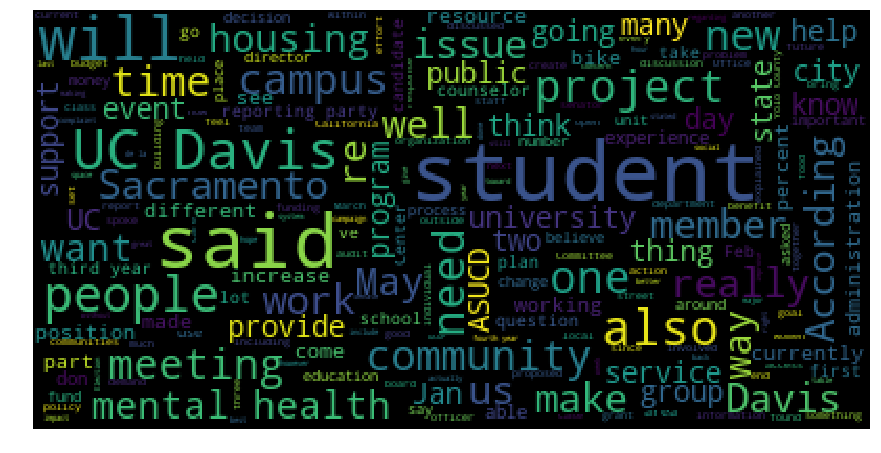

In [93]:
plt.figure(figsize=(15,10))
cloud = wordcloud.WordCloud(max_font_size=40).generate(" ".join(str(v) for v in news_df['text']))
plt.imshow(cloud)
plt.axis("off")
plt.show()

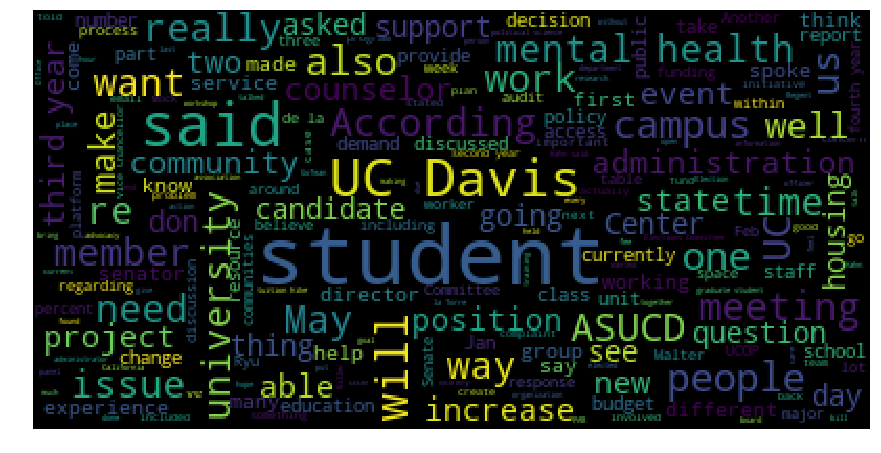

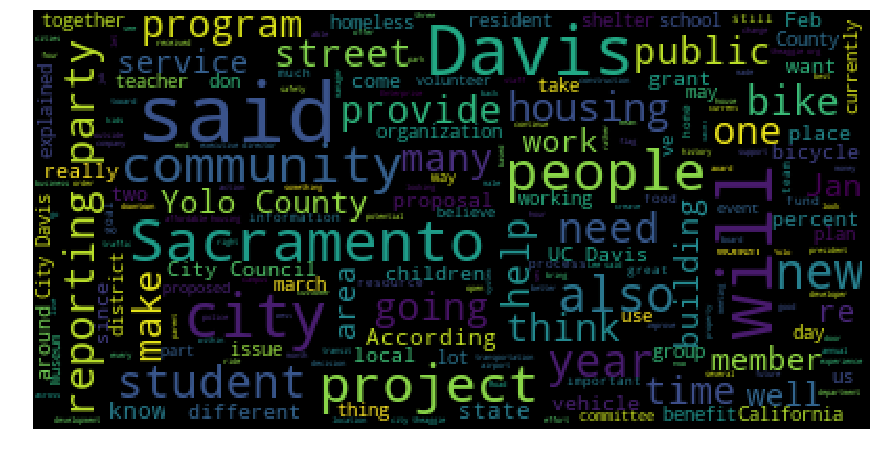

In [59]:
plt.figure(figsize=(15,10))

cloud_2 = wordcloud.WordCloud(max_font_size=40).generate(" ".join(str(v) for v in news_df['text'][0:59]))
plt.imshow(cloud_2)
plt.axis("off")
plt.show()

plt.figure(figsize=(15,10))
cloud_3 = wordcloud.WordCloud(max_font_size=40).generate(" ".join(str(v) for v in news_df['text'][60:119]))
plt.imshow(cloud_3)
plt.axis("off")
plt.show()

From the picture, I can find that the topic of Aggie covers: students, UC Davis, people, university, campus, community, project and work. Also, I find campus news is focused on the students, while city news is focused on sacremento and Davis.

## What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [12]:
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [13]:
import nltk
from textblob import TextBlob
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("brown")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manpa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manpa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\manpa\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manpa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manpa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [63]:
text_list = list(news_df['text'])
vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True)
tfs = vectorizer.fit_transform(text_list)

In [64]:
sim = tfs.dot(tfs.T)
sim
similar_text_foreachtext = []
for i in range(0, sim.shape[0]):
    tfs_similarities = linear_kernel(tfs[i:i+1], tfs).flatten()
    related_docs_indices = tfs_similarities.argsort()[-2]
    similar_text= (related_docs_indices, tfs_similarities[related_docs_indices])
    similar_text_foreachtext.append(similar_text)
similar_text_foreachtext
from operator import itemgetter
sorted_similar = sorted(similar_text_foreachtext, key = itemgetter(1))
sorted_similar

[(33, 0.04605178382848821),
 (19, 0.06303217984375523),
 (71, 0.06889363936972549),
 (65, 0.07671274156879873),
 (17, 0.08102702769383098),
 (95, 0.08747125416687158),
 (11, 0.08784500718570182),
 (77, 0.0940327961622767),
 (48, 0.09427675142918476),
 (22, 0.09800765135046059),
 (87, 0.10367649840708315),
 (114, 0.10764438667203288),
 (78, 0.10919479624048298),
 (53, 0.11232456211708297),
 (105, 0.1137697341558489),
 (1, 0.11428584015772765),
 (1, 0.11699937708109034),
 (29, 0.11894024747792663),
 (2, 0.12190523783721519),
 (45, 0.1238505078186871),
 (1, 0.12495818719443649),
 (29, 0.12780172729519204),
 (89, 0.1284119316936199),
 (38, 0.12853814587393037),
 (7, 0.13034607191749303),
 (92, 0.13110695032465627),
 (100, 0.13583929559124075),
 (108, 0.1405785987980898),
 (48, 0.14456530754024302),
 (39, 0.15276713778766088),
 (100, 0.15574572284795699),
 (94, 0.1588215483303706),
 (19, 0.1588215483303706),
 (95, 0.17288742849602587),
 (67, 0.17288742849602587),
 (35, 0.17449391850617643),

In [66]:
sorted_similar[-6:]

[(47, 0.5506934042774041),
 (22, 0.5506934042774041),
 (5, 0.581438363373123),
 (0, 0.581438363373123),
 (24, 0.6602226477319892),
 (12, 0.6602226477319892)]

In [67]:
news_df['text'][12]

'ACT slate candidates, disqualified Golden Slate candidates allege double standards, unequal accessCandidates involved with this year’s ASUCD Winter Quarter elections have expressed frustration over alleged biases within the association — particularly within the Elections Committee — toward ASUCD-affiliated candidates. Executive candidates from Aggie Community Transfers and former candidates from The Golden Slate have raised complaints for hindrances to their campaigns, a perceived lack of access and double standards between slates with candidates from outside the association and slates with candidates already working inside ASUCD. Adam Hatefi, a third-year political science major, and Shreya Deshpande, a second-year cognitive science and sociology double major, were disqualified from running in the election on The Golden Slate’s executive ticket on Feb. 9 after Deshpande’s failure to be present at an Elections Committee-held mandatory candidate workshop on Feb. 3. The pair appealed th

In [69]:
news_df['text'][0]

'Nonresident UC students will pay $978 more, effective fall of 2018The UC Regents have just approved a 3.5 percent tuition hike for nonresident students. This tuition hike, an increase in tuition of $978 per nonresident student, will be effective in the fall of 2018. The tuition hike was approved with a 12-3 vote after UC President Janet Napolitano urged Regents to approve the increase. According to the LA Times, the Regents will rescind the decision if the California legislature ends up increasing funding to the UC.The impact of the 3.5 percent increase in nonresident tuition will have a $5 million impact on UC Davis. The tuition hike will amount to an overall $34.8 million for the UC.“We all know that we have to pass this,” said regent Hadi Makarechian at the Finance and Capital Strategies Committee meeting on March 14. “All I’m saying is that we really have to organize all the students so they understand it’s not us — you have to run this institution, you have to build housing, you 

In [70]:
news_df['text'][5]

'Proposed $978 tuition hikeAt the upcoming UC Regents meeting which will take place from March 13 to 15 at UCLA, the Regents will vote on a proposed tuition increase for non-California residents who attend the UCs. The proposed tuition hike is an increase of $978 — a 3.5 percent hike. The fee increase would result in an additional $34.8 million for the UC.In May, the Regents will vote on a proposed tuition hike of $342 for in-state students. The UC Regents were originally supposed to vote on the proposed tuition hikes earlier this year, in January, but after widespread student backlash — including at UC Davis — the vote was delayed.In the online Executive Summary of the action item on the “Approval of Nonresident Supplemental Tuition,” the Regents are asked to approve the tuition hike “because ongoing discussions with the State are unlikely to change.” Earlier this year, California Governor Jerry Brown proposed a smaller increase in state funding to the UC for 2018-19 than expected.“In

In [71]:
news_df['text'][22]

'Students demand promised counselors, question allocation of mental health feeOn Feb. 12, at the Mental Health Town Hall organized by Student Health and Counseling Services, three UC Davis administrators faced student questions regarding SHCS’ funding allocation and potentially deliberate setbacks to staff growth. The three administrators — Executive Director of Health and Wellness Margaret Walter, Assistant Vice Chancellor for Divisional Resources of Student Affairs Cory Vu and Director of Multicultural Services for SHCS Paul Kim — delivered opening statements to a room full of about 200 students, faculty and community members. The administrators discussed the findings of the recent internal CS audit from December of 2017, which was published in its entirety several hours before the town hall took place after portions were made public by The California Aggie. Walter, Vu and Kim answered both in-person and online questions — often met by intense audience frustration. The event was live

In [72]:
news_df['text'][47]

'Audit was done two years into $18 million UC effort to expand counseling servicesThis article is the third in a three-part series examining issues that counseling psychologists in the UC system are currently facing, including under-market wages, understaffing and high demand leading to systemwide recruitment and retention issues. \xa0The California Aggie recently obtained and verified a copy of an internal audit of UC Davis Counseling Services performed in December of 2017 by UC Davis Audit and Management Advisory Services. This audit was performed almost two years after the start of an $18 million UC-wide effort to hire additional clinicians throughout the UC system in order to “increase access to mental health services, reduce wait times for students, and complement outreach and prevention efforts.” The audit states that the reported numbers of staff on campus have been inflated to misrepresent the actual number, and that $250,000 worth of mental health funds (MHF) was spent by UC D

In [82]:
l = [12,24,0,5,22,47]
for i in l:
    print (news_df['title'][i])

Executive ticket candidates claim biases against non-ASUCD affiliated individuals
Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop
UC Regents approve nonresident tuition hike
UC Regents will vote on nonresident tuition hike on Wednesday
Mental Health Town Hall erupts in protest
Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds


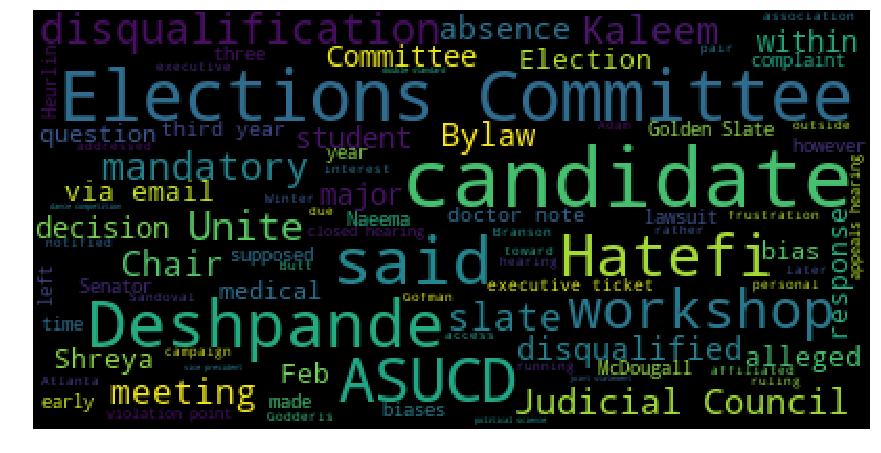

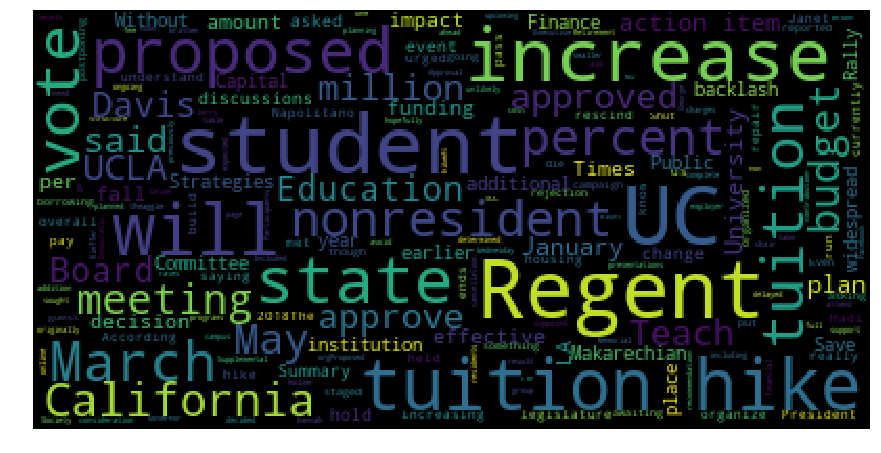

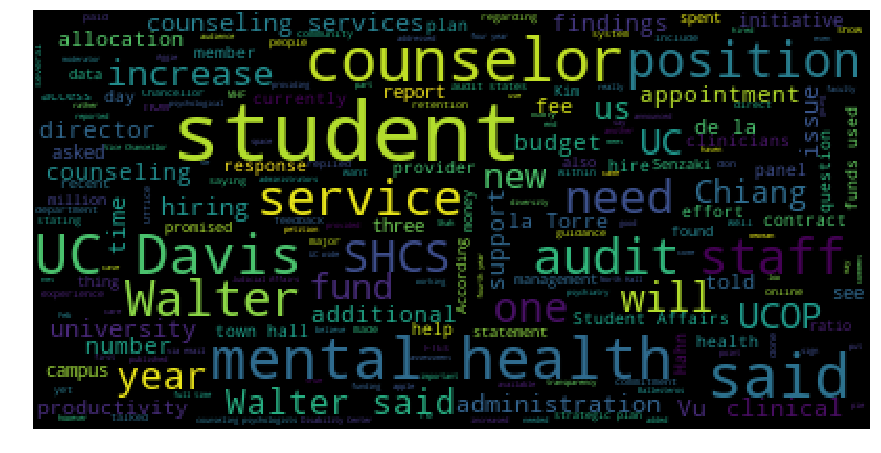

In [74]:
plt.figure(figsize=(15,10))
cloud = wordcloud.WordCloud(max_font_size=40).generate(''.join(news_df['text'][[12,24]]))
plt.imshow(cloud)
plt.axis("off")
plt.show()

plt.figure(figsize=(15,10))
cloud2 = wordcloud.WordCloud(max_font_size=40).generate(''.join(news_df['text'][[0,5]]))
plt.imshow(cloud2)
plt.axis("off")
plt.show()

plt.figure(figsize=(15,10))
cloud3 = wordcloud.WordCloud(max_font_size=40).generate(''.join(news_df['text'][[22,47]]))
plt.imshow(cloud3)
plt.axis("off")
plt.show()


By similarity matrix,  I find top three most similar pairs of news are (12, 24), (0, 5) and (22, 47). I print the titles of those 6 texts, compare the text for each pair of news, the first pair of news are both related candidates workshop, the second pair of news are both related to UC Regents and the third pair of news are both about funds. 


By the wordcloud, for the first pair, the common words are "elections", "committee", "candidate", "workshop", "deshpande", "ASUCD", "Hatefi" and so on. For the second pair, the common words are "increase", "student", "regent", "tuition", "hike", "budget", "nonresident" and so on. For the third pair, the common words are "counselor", "position", "student", "service", "walter", "audit", "mental","health" and so on.

## Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

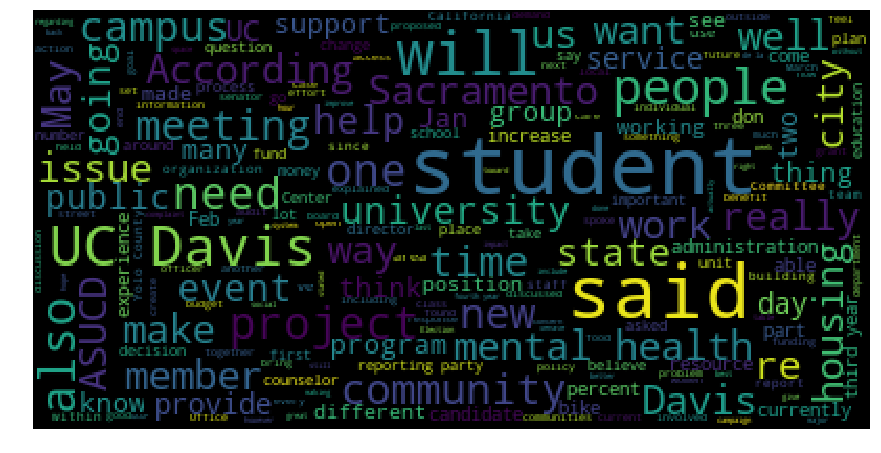

In [96]:
plt.figure(figsize=(15,10))
cloud = wordcloud.WordCloud(max_font_size=40).generate(" ".join(str(v) for v in news_df['text']))
plt.imshow(cloud)
plt.axis("off")
plt.show()

By the wordcloud in Aggie news, I find that the common words are UC, Davis, student, community, time, university, campus, project, housing, health, mental, ASUCD. I think they can represent news recently. However, since the number of articles is not large, they cannot represent all articles in Aggie news.

Also, by this corpus, I can make inferences that the corpus is mainly about something like school life of UC Davis students, housing, mental health for both students and city residents, research academic projects, some events in Sacramento, administration in university and so on.